In [1]:
# Importing the all the Important library .
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup, Comment
import pandas as pd
import os
os.environ["LANG"] = "en_US.UTF-8"

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt

In [2]:
#Setting up Chrome webdriver Options
chrome_options = webdriver.ChromeOptions()

#setting  up local path of chrome binary file 


#creating Chrome webdriver instance with the set chrome_options
driver = webdriver.Chrome("C:/Users/sujit/Downloads/chromedriver.exe")

link = "https://play.google.com/store/apps/details?id=com.rovio.angrybirdsrio&showAllReviews=true"
driver.get(link)
#driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
Ptitle = driver.find_element_by_class_name('AHFaub').text.replace(' ','')

sleep(1)

# for parsing the rating for the reviews 
starts = []
for element in driver.find_elements_by_css_selector('.pf5lIe > div[aria-label]'):
#     print(element.get_attribute("aria-label"))
    starts.append(element.get_attribute("aria-label"))

    
# this loop is for getting only the numeric values form the reviews.
import re
Ratings=[]
for i in starts:
    temp = re.findall(r'\d+', i) 
    Ratings.append(temp[0])
    

# for getting the reviews from google play store.
reviews = []
for element in driver.find_elements_by_css_selector('span[jsname="bN97Pc"]'):
    reviews.append(element.text)

# processing the reviews .     
final_review = []
for i in reviews:
    i = i.replace("...\nFull Review", " ")
    final_review.append(i)


In [3]:
len(final_review)

40

In [4]:
# the reviews that we got from google play 
final_review[1]

"Wonderfull game with 2parts Rio and Rio 2 Also it's very easy to play I love this game you can play this with special power ups and birds like red,blue,chuck,bomb like the story"

In [5]:
# the ratings that we got from google play .
Ratings[1:10]

['5', '5', '2', '4', '3', '5', '4', '2', '5']

In [6]:
# this is general function for getting the words correct and having the full form rather than the shortcuts 
import re
def decontracted(phrase):
# specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
# general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [7]:
# these are the stop words 
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [8]:
# this function combines all of the functions of above .
from tqdm import tqdm
preprocessed_essays = []
for sentance in tqdm(final_review):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 2678.31it/s]


In [9]:
# after the processing of the words .
preprocessed_essays[1]

'wonderfull game 2parts rio rio 2 also easy play love game play special power ups birds like red blue chuck bomb like story'

In [10]:
# lets create the euqla lenth for both the reviews and the ratings 
Max_length_Review = len(preprocessed_essays)
Ratings = Ratings[:Max_length_Review]


In [11]:
# creating a data frame for the preprocessed_reviews and the ratings 

df = pd.DataFrame(preprocessed_essays,columns=["preprocessed_review"])

print(df.head(5))

                                 preprocessed_review
0  recommend download game worth loading killer g...
1  wonderfull game 2parts rio rio 2 also easy pla...
2  game came back 2012 enjoyed much 2019 installe...
3  shame game wiped google play apple app store e...
4  game freezes redeem daily gift love angry bird...


In [12]:
# adding the ratings to the dataframe . 
df["Ratings"] =Ratings
df

,preprocessed_review,Ratings
0,recommend download game worth loading killer g...,4
1,wonderfull game 2parts rio rio 2 also easy pla...,5
2,game came back 2012 enjoyed much 2019 installe...,5
3,shame game wiped google play apple app store e...,2
4,game freezes redeem daily gift love angry bird...,4
5,played playing angry birds space stinks made h...,3
6,days people try find mind games comfort build ...,5
7,soon install game get level 7 smugglers den fr...,4
8,game could ask mobile game 100 recommended rem...,2
9,game great adds pop shot sort kills fun aspect...,5


In [13]:
"""here i have taken the thershold of 3 as 
if the rating is < = 3 then we will count it as negative else it will be postivie """

false_positive= []
True_postive = []
for i in range(Max_length_Review):
    if (int(df["Ratings"].values[i]) <= 3):
        false_positive.append(df["preprocessed_review"][i])
    else:
        True_postive.append(df["preprocessed_review"][i])


In [19]:
len(false_positive)

21

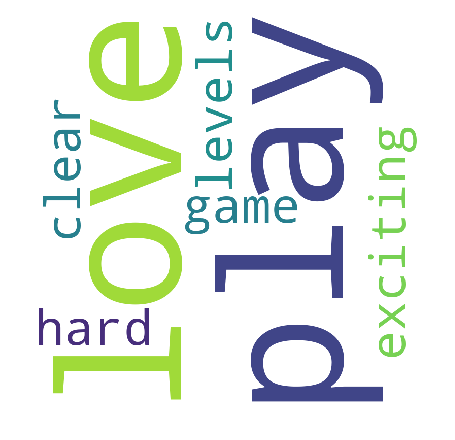

In [21]:

""" Word Cloud for the Postive words """
comment_words = ' '
stopwords = set(STOPWORDS)
for val in True_postive :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

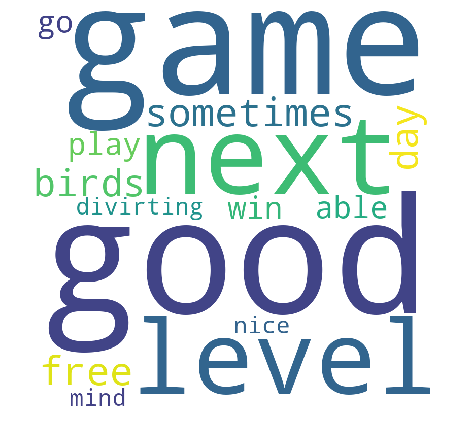

In [22]:
""" Word Cloud for the Negative words """

comment_words = ' '
stopwords = set(STOPWORDS)
for val in false_positive :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()